Emilio Taggi 1910388 2023/01/14
part2Notebook.ipynb

In [1]:
#with these we can print variables 'inline'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. - 2. - 3.

In [86]:
#import relevant libraries
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import emcee

In [54]:
#class to implement a canonical parabola
class canonicalParabola:
    a = 1
    b = 1
    c = 1
    
    #initialization
    def __init__(self,a=a,b=b,c=c): 
        self.a = a
        self.b = b
        self.c = c
    
    #compute discriminant of the parabola
    def discr(self):
        return self.b**2 -4*self.a*self.c
    
    #method to find where the parabola crosses the x axis
    def zeros(self):
        discr = self.discr()
        #if it do not cross the x axis i return an empty tuple
        if discr < 0: return () 
        #with the vertex on the x axis i return one point
        elif discr == 0: return   (-0.5*self.b/self.a) 
        #with 2 solution i return them
        elif discr > 0: return ( 0.5*(-self.b - np.sqrt(discr))/self.a , 0.5*(-self.b + np.sqrt(discr))/self.a ) 
    
    #return value of parabola at a given x
    def y(self, x):
        return self.a*x**2 + self.b*x + self.c
    
    
    #return integral of parabola between xmin and xmax
    def integral(self,xmin,xmax):
        return integrate.quad(lambda x: self.a*x**2 + self.b*x + self.c, xmin, xmax)

In [55]:
#rapid check of correct behavior
myPar = canonicalParabola(1,2,0)
myPar.discr()
myPar.zeros()
myPar = canonicalParabola(1,0,0)
myPar.discr()
myPar.zeros()
myPar = canonicalParabola(1,2,10)
myPar.discr()
myPar.zeros()

4

(-2.0, 0.0)

0

-0.0

-36

()

In [59]:
#check of correct integration
myPar = canonicalParabola(1,0,0)
myPar.integral(-1,1)
myPar.integral(-1,1)[0] == 2/3

(0.6666666666666666, 7.401486830834376e-15)

True

# 4.

In [76]:
#data generation
x = np.linspace(-5,5,100)
x
par1 = canonicalParabola(5,-3,2)
y = par1.y(x)
y
mu=0
sigma=15
yerr = np.random.normal(mu,sigma,np.shape(y))
y_yerr = y + yerr
y_yerr

#saving to file
fname = 'outfile.dat'
np.savetxt(fname, (x,y,y_yerr), delimiter="\t", fmt="%.3f")

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

array([142.        , 136.69747985, 131.4969901 , 126.39853076,
       121.40210183, 116.5077033 , 111.71533517, 107.02499745,
       102.43669013,  97.95041322,  93.56616672,  89.28395062,
        85.10376492,  81.02560963,  77.04948475,  73.17539027,
        69.40332619,  65.73329252,  62.16528926,  58.6993164 ,
        55.33537394,  52.07346189,  48.91358025,  45.85572901,
        42.89990817,  40.04611774,  37.29435772,  34.6446281 ,
        32.09692888,  29.65126008,  27.30762167,  25.06601367,
        22.92643608,  20.88888889,  18.9533721 ,  17.11988573,
        15.38842975,  13.75900418,  12.23160902,  10.80624426,
         9.48290991,   8.26160596,   7.14233242,   6.12508928,
         5.20987654,   4.39669421,   3.68554229,   3.07642077,
         2.56932966,   2.16426895,   1.86123865,   1.66023875,
         1.56126926,   1.56433017,   1.66942149,   1.87654321,
         2.18569534,   2.59687787,   3.11009081,   3.72533415,
         4.4426079 ,   5.26191205,   6.18324661,   7.20

array([137.6927478 , 122.56119967, 145.31546647, 157.55848121,
       129.8462247 , 114.57081859,  98.67906616, 104.79648202,
        99.93477543,  78.89167726,  84.76262423,  89.68258415,
        92.41524255,  86.95647596,  55.44582377,  90.64081019,
        91.7278379 ,  85.08717794,  52.8534022 ,  61.25468945,
        71.08141372,  56.95440218,  72.36842034,  63.40338512,
        17.97723936,  41.05080297,  41.01653743,  52.61333545,
        42.67896478,  64.67004657,  16.49468711,  52.17312205,
         2.23070004,  49.91094923,   3.86981507,  -2.44368263,
         7.75512024,  29.07340532,   9.49557482,  26.41574444,
        19.14685045,   1.780612  , -30.85307719,  24.70230189,
        -9.09423182,  10.90419834,   3.49868229,  19.17364039,
         9.02562382,  17.55314399,  35.52593123,  24.90887932,
         7.35018091,  15.73785085,   2.99015125,  -4.11478634,
       -12.93251503, -15.93776539,  15.39043335, -31.92773249,
        -3.77649271,   0.96126944,  -1.04730172,  21.04

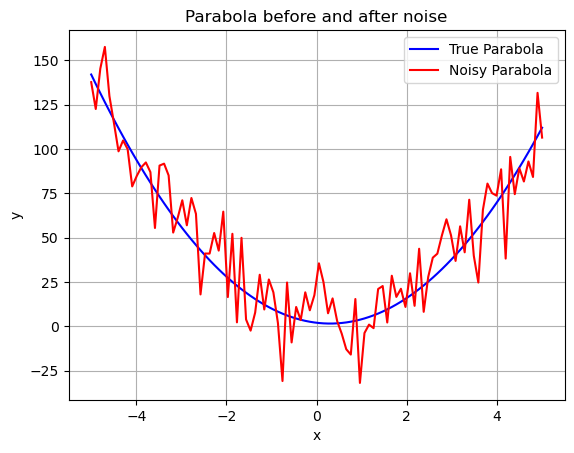

In [77]:
#plot of parabola
%matplotlib inline
fig, ax = plt.subplots()

ax.grid()
_  = ax.plot(x, y, label='True Parabola',color='blue')
_ = ax.plot(x, y_yerr, label='Noisy Parabola', color = 'red')
_ = ax.set_title('Parabola before and after noise')
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.legend()

# 5.

In [94]:
#setting up monte carlo simulation
def fitFunc(x,a,b,c):
    return a*x**2 +b*x+c

def log_likelihood(theta, x, y, yerr):
    a,b,c = theta
    model = fitFunc(x,a,b,c)
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    a,b,c = theta
    # Return a finite value if theta is in the parameter space region with support for the prior
    if -5*abs(par1.a) < a < 5*abs(par1.a) and -5*abs(par1.b) < b < 5*abs(par1.b) and -5*abs(par1.c) < c < 5*abs(par1.c):
        return 0.0
    # Otherwise return -infinity, basically a massive down-weight for the posterior
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    # If theta is outside the support for the prior, return -infinity
    if not np.isfinite(lp):
        return -np.inf
    # Otherwise return the logarithm of prior*likelihood
    return lp + log_likelihood(theta, x, y, yerr)

In [95]:
#Monte Carlo simulation parameters:

#number of walkers
nwalkers = 32
#dimensionality of the parameter space (a,b,c)
ndim = 3
#MCMC steps
nmcmc = 5000

# Initial position
truths = [par1.a,par1.b,par1.c]
pos = np.asarray( [ truths for i in range(nwalkers)] ,dtype =float) #start from original value
for i in range(ndim):
    pos[:,i] += 0.1*truths[i] * np.random.randn(nwalkers) #and add noise to it

# Run the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, nmcmc, progress=True); # The ; avoids some prints to screen

100%|██████████████████████████████████████| 5000/5000 [00:20<00:00, 238.80it/s]


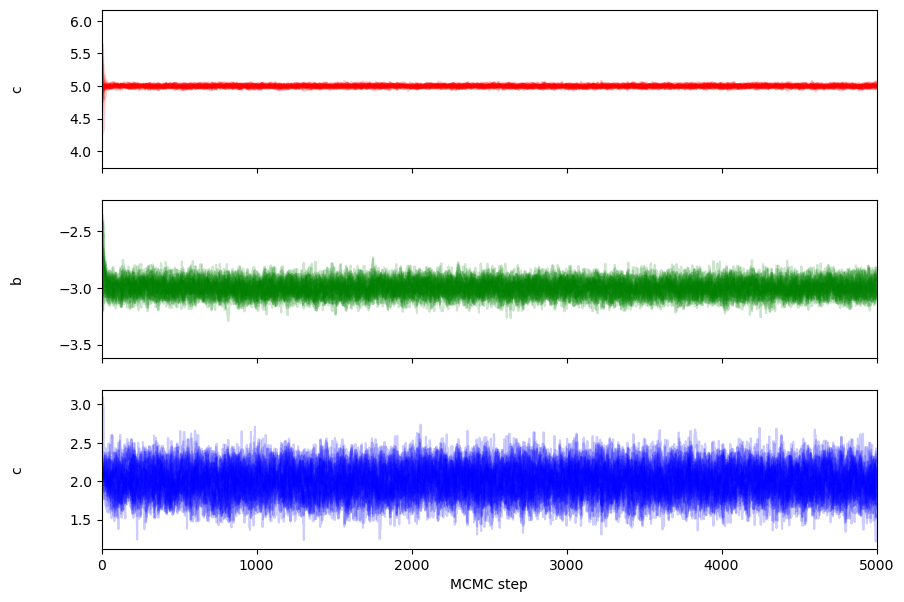

In [96]:
#plot of walks
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["c", "b", "c"]
col = ['r', 'g', 'b']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], col[i], alpha=0.2) # 
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("MCMC step"); # The ; avoids an unwanted output to screen.

In [99]:
tau = sampler.get_autocorr_time()
tau
flat_samples = sampler.get_chain(discard=int(2.5*max(tau)), thin=int(min(tau)/2), flat=True)

array([29.8226288 , 34.34953834, 36.79969673])

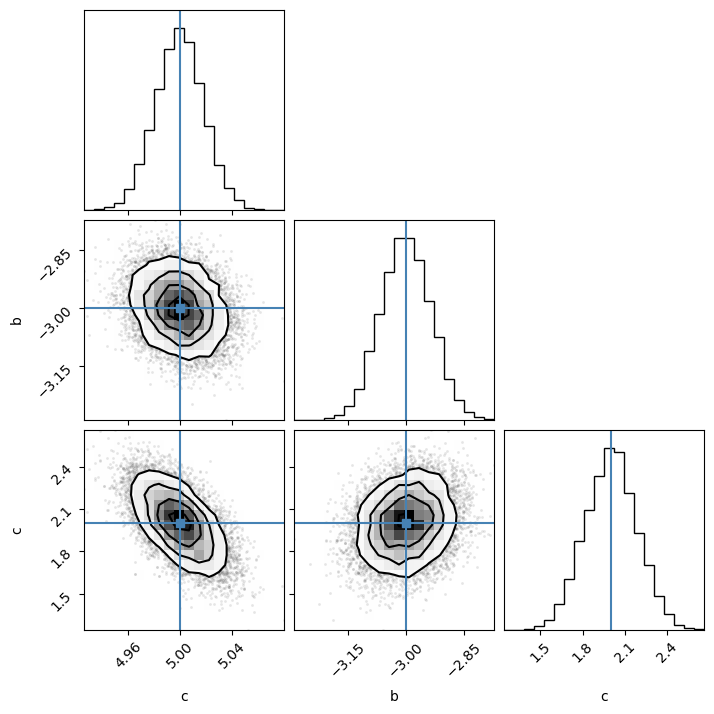

In [104]:
#plot of posterior distribution of parameter
import corner

fig = corner.corner(flat_samples, labels=labels, truths=truths)

In [106]:
#average value to use for the fit
mc_fit_a = np.mean(flat_samples[:,0])
mc_fit_b = np.mean(flat_samples[:,1])
mc_fit_c = np.mean(flat_samples[:,2])
mc_fit_a
mc_fit_b
mc_fit_c

4.999452962962554

-2.9999714166745806

2.002128056031451

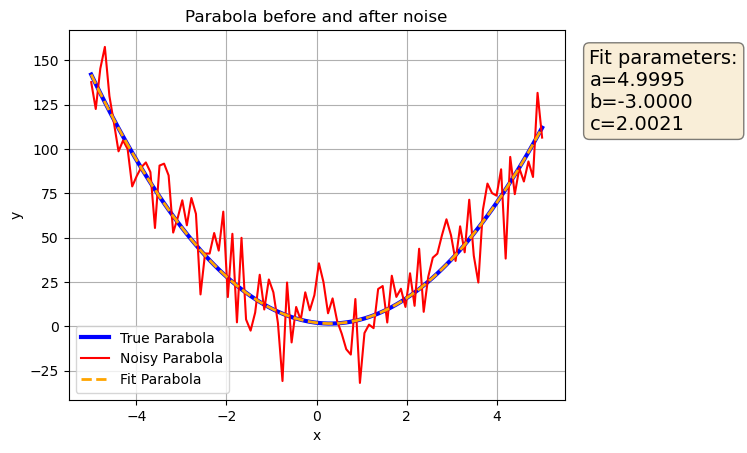

In [120]:
#plot of the fit using average values
%matplotlib inline
fig, ax = plt.subplots()

ax.grid()
_  = ax.plot(x, y, label='True Parabola',color='blue',lw =3)
_ = ax.plot(x, y_yerr, label='Noisy Parabola', color = 'red')
_ = ax.set_title('Parabola before and after noise')
_ = ax.plot(x, fitFunc(x,mc_fit_a,mc_fit_b,mc_fit_c), label='Fit Parabola', color = 'orange',linestyle="dashed",lw=2)
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.legend()

#Display text box with fitparameters outside plot
textstr = '\n'.join((
    'Fit parameters:',
    r'a=%.4f' % (mc_fit_a ),
    r'b=%.4f' % (mc_fit_b ),
    r'c=%.4f' % (mc_fit_c ), ))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place the text box in upper left in axes coords
_ = ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)